## Analisis exploratorio de datos

### Import de Librerias, carga de datos y funcion para sanitizar los DF

In [1]:
# Librerias necesarias para el desarrollo del proyecto
import os
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
# Rutas de los datos
path_maiz = '/content/drive/MyDrive/UPSO ML & BD/DatasetGob/maiz-serie-1923-2019-anual.csv'
path_girasol = '/content/drive/MyDrive/UPSO ML & BD/DatasetGob/girasol-anual-1969-2019.csv'
path_trigo = '/content/drive/MyDrive/UPSO ML & BD/DatasetGob/trigo-serie-1923-2020-anual.csv'
path_centeno = '/content/drive/MyDrive/UPSO ML & BD/DatasetGob/centeno-anual-1923-2020.csv'
path_soja = '/content/drive/MyDrive/UPSO ML & BD/DatasetGob/soja-anual-1969-2020.csv'
path_estimacion = '/content/drive/MyDrive/UPSO ML & BD/DatasetGob/estimaciones-agricolas-2023-10-trigo.xlsx'
path_soja_estimacion = '/content/drive/MyDrive/UPSO ML & BD/DatasetGob/estimaciones-agricolas-2023-10.-soja.xlsx'
path_biocombustible = '/content/drive/MyDrive/UPSO ML & BD/DatasetGob/produccion-de-biodiesel-por-planta-de-produccion-.csv'

In [3]:
def sanitizar_dataframe(df):
    """
    Sanitiza el DataFrame eliminando filas con valores NaN y convierte las columnas numéricas al tipo correspondiente.

    Parameters:
    - df (pd.DataFrame): El DataFrame a sanitizar.

    Returns:
    - pd.DataFrame: DataFrame sanitizado.
    """
    for columna in df.columns:
        # Aplica las transformaciones
        if pd.api.types.is_numeric_dtype(df[columna]):
            # Si la columna es de tipo numérico
            df[columna] = pd.to_numeric(df[columna], errors='coerce')
            # Elimina filas con NaN
            df = df.loc[~df[columna].isna()]
            # Convierte la columna al tipo correspondiente
            df[columna] = df[columna].astype(df[columna].dtype)

    return df


### Maiz

In [ ]:
df_maiz = pd.read_csv(path_maiz)   #cargar el archivo csv en un df
df_maiz.head()

,indice_tiempo,superficie_sembrada_maiz_ha,superficie_cosechada_maiz_ha,produccion_maiz_t,rendimiento_maiz_kgxha
0,1923,3435430,NaN,7030000,NaN
1,1924,3707700,2911768.0,4732235,1625.0
2,1925,4297000,3898912.0,8170000,2096.0
3,1926,4289000,3666650.0,8150000,2223.0
4,1927,4346000,3641826.0,7915000,2173.0


In [ ]:
df_maiz.shape

(97, 5)

In [ ]:
# Sanitizo el DF porque vi que tenia algunos NaN, asique por buena practica voy a sanitizar cualquier DF antes de usarlo
df_maiz = sanitizar_dataframe(df_maiz)
df_maiz.head()

,indice_tiempo,superficie_sembrada_maiz_ha,superficie_cosechada_maiz_ha,produccion_maiz_t,rendimiento_maiz_kgxha
1,1924,3707700,2911768.0,4732235,1625.0
2,1925,4297000,3898912.0,8170000,2096.0
3,1926,4289000,3666650.0,8150000,2223.0
4,1927,4346000,3641826.0,7915000,2173.0
5,1928,4788000,3652577.0,6411529,1755.0


In [ ]:
df_maiz.shape

(96, 5)

In [ ]:
fig = px.line(df_maiz, x='indice_tiempo',
              y=['superficie_sembrada_maiz_ha', 'superficie_cosechada_maiz_ha', 'produccion_maiz_t'],
              title='Tendencia de Características de maiz por Año',
              labels={'indice_tiempo': 'Año', 'value': 'Valor', 'variable': 'Característica'},
              width=800, height=500,
              color_discrete_map={'superficie_sembrada_maiz_ha': 'blue', 'superficie_cosechada_maiz_ha': 'orange', 'produccion_maiz_t': 'green'})

# Mostrar la figura
fig.show()

In [ ]:
# Graficar el rendimiento de maiz por año
fig_rendimiento = px.line(df_maiz, x='indice_tiempo', y='rendimiento_maiz_kgxha',

                           title='Tendencia de Rendimiento de maiz por Año',
                           labels={'indice_tiempo': 'Año', 'rendimiento_maiz_kgxha': 'Rendimiento (kg/ha)'},
                           width=800, height=500, line_shape="linear", render_mode="auto",
                          )


# Mostrar la figura
fig_rendimiento.show()

### Girasol

In [ ]:
df_girasol = pd.read_csv(path_girasol)   #cargar el archivo csv en un df
df_girasol = sanitizar_dataframe(df_girasol)
df_girasol.head()

,anio,superficie_sembrada_girasol_ha,superficie_cosechada_girasol_ha,produccion_girasol_t,rendimiento_girasol_kgxha
0,1969,1472300,1347400,1140000,846
1,1970,1614200,1313100,830000,632
2,1971,1532700,1286500,828000,644
3,1972,1652400,1337900,880000,658
4,1973,1341900,1189800,970000,815


In [ ]:
df_girasol.shape

(51, 5)

In [ ]:
fig = px.line(df_girasol, x='anio',
              y=['superficie_sembrada_girasol_ha', 'superficie_cosechada_girasol_ha', 'produccion_girasol_t'],
              title='Tendencia de Características de girasol por Año',
              labels={'anio': 'Año', 'value': 'Valor', 'variable': 'Característica'},
              width=800, height=500,
              color_discrete_map={'superficie_sembrada_girasol_ha': 'blue', 'superficie_cosechada_girasol_ha': 'orange', 'produccion_girasol_t': 'green'})

# Mostrar la figura
fig.show()

### Trigo

In [ ]:
df_trigo = pd.read_csv(path_trigo)
df_trigo = sanitizar_dataframe(df_trigo)
df_trigo.head()

,indice_tiempo,superficie_sembrada_trigo_ha,superficie_cosechada_trigo_ha,produccion_trigo_t,rendimiento_trigo_kgxha
0,1923,6833343,6778430,6635565,979
1,1924,7200500,6465440,5201979,805
2,1925,6577970,5928650,4093998,691
3,1926,7800000,7669751,6261624,816
4,1927,8372990,8172990,7682990,940


In [ ]:
df_trigo.shape

(98, 5)

In [ ]:
df_trigo.columns

Index(['indice_tiempo', 'superficie_sembrada_trigo_ha',
       'superficie_cosechada_trigo_ha', 'produccion_trigo_t',
       'rendimiento_trigo_kgxha'],
      dtype='object')

In [ ]:
# Agrupar por año y calcular el rendimiento promedio
df_agrupado = df_trigo.groupby('indice_tiempo')['rendimiento_trigo_kgxha'].mean().reset_index()

# Graficar con Plotly Express
fig = px.bar(df_agrupado, x='indice_tiempo', y='rendimiento_trigo_kgxha',
              title='Rendimiento de Trigo por Año',
              labels={'indice_tiempo': 'Año', 'rendimiento_trigo_kgxha': 'Rendimiento (kg/ha)'},
              width=800, height=500)

# Mostrar la figura
fig.show()

In [ ]:
fig = px.bar(df_trigo, x='indice_tiempo',
              y=['superficie_sembrada_trigo_ha', 'superficie_cosechada_trigo_ha', 'produccion_trigo_t', 'rendimiento_trigo_kgxha'],
              title='Comparación de Características de Trigo por Año',
              labels={'indice_tiempo': 'Año', 'value': 'Valor', 'variable': 'Característica'},
              width=800, height=500,
              category_orders={'variable': ['superficie_sembrada_trigo_ha', 'superficie_cosechada_trigo_ha', 'produccion_trigo_t', 'rendimiento_trigo_kgxha']},
              color_discrete_map={'superficie_sembrada_trigo_ha': 'blue', 'superficie_cosechada_trigo_ha': 'orange', 'produccion_trigo_t': 'green', 'rendimiento_trigo_kgxha': 'red'})

# Mostrar la figura
fig.show()

In [ ]:
fig = px.line(df_trigo, x='indice_tiempo',
              y=['superficie_sembrada_trigo_ha', 'superficie_cosechada_trigo_ha', 'produccion_trigo_t'],
              title='Tendencia de Características de Trigo por Año',
              labels={'indice_tiempo': 'Año', 'value': 'Valor', 'variable': 'Característica'},
              width=800, height=500,
              color_discrete_map={'superficie_sembrada_trigo_ha': 'blue', 'superficie_cosechada_trigo_ha': 'orange', 'produccion_trigo_t': 'green'})

# Mostrar la figura
fig.show()

In [ ]:
# Graficar el rendimiento de trigo por año
fig_rendimiento = px.line(df_trigo, x='indice_tiempo', y='rendimiento_trigo_kgxha',

                           title='Tendencia de Rendimiento de Trigo por Año',
                           labels={'indice_tiempo': 'Año', 'rendimiento_trigo_kgxha': 'Rendimiento (kg/ha)'},
                           width=800, height=500, line_shape="linear", render_mode="auto",
                          )


# Mostrar la figura
fig_rendimiento.show()

### Soja

In [ ]:
df_soja = pd.read_csv(path_soja)   #cargar el archivo csv en un df
df_soja = sanitizar_dataframe(df_soja)
df_soja.head()

,indice_tiempo,superficie_sembrada_soja_ha,superficie_cosechada_soja_ha,produccion_soja_t,rendimiento_soja_kgxha
0,1969,30470,25970,26800,1032
1,1970,37700,36330,59000,1624
2,1971,79800,68000,78000,1147
3,1972,169360,156950,271904,1732
4,1973,376600,344340,495880,1440


In [ ]:
fig = px.line(df_soja, x='indice_tiempo',
              y=['superficie_sembrada_soja_ha', 'superficie_cosechada_soja_ha', 'produccion_soja_t'],
              title='Tendencia de Características de soja por Año',
              labels={'indice_tiempo': 'Año', 'value': 'Valor', 'variable': 'Característica'},
              width=800, height=500,
              color_discrete_map={'superficie_sembrada_soja_ha': 'blue', 'superficie_cosechada_soja_ha': 'orange', 'produccion_soja_t': 'green'})
fig.show()

In [ ]:
# Graficar el rendimiento de trigo por año
fig_rendimiento = px.line(df_soja, x='indice_tiempo', y='rendimiento_soja_kgxha',

                           title='Tendencia de Rendimiento de soja por Año',
                           labels={'indice_tiempo': 'Año', 'rendimiento_soja_kgxha': 'Rendimiento (kg/ha)'},
                           width=800, height=500, line_shape="linear", render_mode="auto",
                          )


# Mostrar la figura
fig_rendimiento.show()

### Centeno

In [ ]:
df_centeno = pd.read_csv(path_centeno)
df_centeno = sanitizar_dataframe(df_centeno)
df_centeno.head()

,indice_tiempo,superficie_sembrada_centeno_ha,superficie_cosechada_centeno_ha,produccion_centeno_t,rendimiento_centeno_kgxha
0,1923,157510,152652,97876.0,641
1,1924,156000,65471,37020.0,565
2,1925,202590,144092,121163.0,841
3,1926,220100,197095,142120.0,721
4,1927,339800,268663,207505.0,772


In [ ]:
df_centeno.shape

(98, 5)

In [ ]:
fig = px.line(df_centeno, x='indice_tiempo',
              y=['superficie_sembrada_centeno_ha', 'superficie_cosechada_centeno_ha', 'produccion_centeno_t'],
              title='Tendencia de Características de centeno por Año',
              labels={'indice_tiempo': 'Año', 'value': 'Valor', 'variable': 'Característica'},
              width=800, height=500,
              color_discrete_map={'superficie_sembrada_centeno_ha': 'blue', 'superficie_cosechada_centeno_ha': 'orange', 'produccion_centeno_t': 'green'})

# Mostrar la figura
fig.show()

In [ ]:
# Graficar el rendimiento de trigo por año
fig_rendimiento = px.line(df_centeno, x='indice_tiempo', y='rendimiento_centeno_kgxha',

                           title='Tendencia de Rendimiento de centeno por Año',
                           labels={'indice_tiempo': 'Año', 'rendimiento_centeno_kgxha': 'Rendimiento (kg/ha)'},
                           width=800, height=500, line_shape="linear", render_mode="auto",
                          )


# Mostrar la figura
fig_rendimiento.show()

### Biocombustible

In [ ]:
df_biocombustible = pd.read_csv(path_biocombustible)
df_biocombustible.head()

,id_cod_pais,id_ nom_pais,año,mes,id_uni_med,id_nom_med,grande,grande no integrada,mediana,pequeña
0,32,Argentina,2014,Enero,t,toneladas,86639,3545,44409,5879
1,32,Argentina,2014,Febrero,t,toneladas,100526,7885,21999,2179
2,32,Argentina,2014,Marzo,t,toneladas,81779,963,36880,1572
3,32,Argentina,2014,Abril,t,toneladas,74163,20169,45902,2236
4,32,Argentina,2014,Mayo,t,toneladas,144216,22853,57941,4292


In [ ]:
df_biocombustible.shape

(65, 10)

### ESTIMACIONES AGRICOLAS

In [4]:
df_estimacion = pd.read_excel(path_estimacion)
df_estimacion.head()

,"id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campania,campania,sup_sembrada,sup_cosechada,produccion ,rendimiento"
0,"6,Buenos Aires,854,25 de Mayo,1,Ajo,1,1969/197..."
1,"6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo..."
2,"6,Buenos Aires,21,Alberti,1,Ajo,1,1969/1970,5,..."
3,"6,Buenos Aires,28,Almirante Brown,1,Ajo,1,1969..."
4,"6,Buenos Aires,77,Arrecifes,1,Ajo,1,1969/1970,..."


In [5]:
def organizar_datos(dataframe):
    # Divide la columna combinada en varias columnas
    columnas_separadas = dataframe[
        'id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campania,campania,sup_sembrada,sup_cosechada,produccion ,rendimiento'].str.split(',', expand=True)

    # Asigna los nombres de las columnas al DataFrame resultante
    columnas_separadas.columns = [
        'id_provincia', 'provincia', 'id_departamento', 'departamento', 'id_cultivo', 'cultivo', 'id_campania', 'campania', 'sup_sembrada', 'sup_cosechada', 'produccion', 'rendimiento']

    # Combina el DataFrame original con las nuevas columnas
    dataframe = pd.concat([dataframe, columnas_separadas], axis=1)

    # Elimina la columna combinada original
    dataframe.drop('id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campania,campania,sup_sembrada,sup_cosechada,produccion ,rendimiento', axis=1, inplace=True)

    return dataframe

df = pd.DataFrame(df_estimacion)

# Llama a la función para organizar los datos
df_organizado = organizar_datos(df)

# Muestra el DataFrame resultante
df_organizado

,id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campania,campania,sup_sembrada,sup_cosechada,produccion,rendimiento
0,6,Buenos Aires,854,25 de Mayo,1,Ajo,1,1969/1970,3,3,10,3333
1,6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo,1,1969/1970,15,15,82,5467
2,6,Buenos Aires,21,Alberti,1,Ajo,1,1969/1970,5,5,7,1400
3,6,Buenos Aires,28,Almirante Brown,1,Ajo,1,1969/1970,2,2,8,4000
4,6,Buenos Aires,77,Arrecifes,1,Ajo,1,1969/1970,6,6,15,2500
...,...,...,...,...,...,...,...,...,...,...,...,...
153884,90,Tucuman,49,La Cocha,28,Trigo total,53,2022/2023,11880,10440,7308,700
153885,90,Tucuman,56,Leales,28,Trigo total,53,2022/2023,15300,14325,8595,600
153886,90,Tucuman,63,Lules,28,Trigo total,53,2022/2023,300,300,330,1100
153887,90,Tucuman,91,Simoca,28,Trigo total,53,2022/2023,200,200,200,1000


In [6]:
df_organizado.shape

(153889, 12)

In [7]:
df_estimacion = sanitizar_dataframe(df_estimacion)
df_estimacion.shape

(153889, 1)

In [8]:
columnas_selec = ['id_provincia', 'provincia', 'id_cultivo','campania', 'cultivo', 'sup_sembrada', 'sup_cosechada', 'produccion', 'rendimiento']

nuevo_df = df_organizado[columnas_selec]

# Muestra el nuevo DataFrame
nuevo_df

,id_provincia,provincia,id_cultivo,campania,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
0,6,Buenos Aires,1,1969/1970,Ajo,3,3,10,3333
1,6,Buenos Aires,1,1969/1970,Ajo,15,15,82,5467
2,6,Buenos Aires,1,1969/1970,Ajo,5,5,7,1400
3,6,Buenos Aires,1,1969/1970,Ajo,2,2,8,4000
4,6,Buenos Aires,1,1969/1970,Ajo,6,6,15,2500
...,...,...,...,...,...,...,...,...,...
153884,90,Tucuman,28,2022/2023,Trigo total,11880,10440,7308,700
153885,90,Tucuman,28,2022/2023,Trigo total,15300,14325,8595,600
153886,90,Tucuman,28,2022/2023,Trigo total,300,300,330,1100
153887,90,Tucuman,28,2022/2023,Trigo total,200,200,200,1000


In [ ]:
nuevo_df.columns

Index(['id_provincia', 'provincia', 'id_cultivo', 'campania', 'cultivo',
       'sup_sembrada', 'sup_cosechada', 'produccion', 'rendimiento'],
      dtype='object')

In [ ]:
df_new = df_organizado[['rendimiento', 'provincia','cultivo']]
df_new

,rendimiento,provincia,cultivo
0,3333,Buenos Aires,Ajo
1,5467,Buenos Aires,Ajo
2,1400,Buenos Aires,Ajo
3,4000,Buenos Aires,Ajo
4,2500,Buenos Aires,Ajo
...,...,...,...
153884,700,Tucuman,Trigo total
153885,600,Tucuman,Trigo total
153886,1100,Tucuman,Trigo total
153887,1000,Tucuman,Trigo total


In [ ]:
# Cultivos Seleccionados
cultivos_deseados = ['Trigo total']

# Filtro el DataFrame solo para esos
df_filtrado = nuevo_df[nuevo_df['cultivo'].isin(cultivos_deseados)]

# Muestra el DataFrame resultante
df_filtrado

,id_provincia,provincia,id_cultivo,campania,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
3801,6,Buenos Aires,28,1969/1970,Trigo total,47000,42000,71400,1700
3802,6,Buenos Aires,28,1969/1970,Trigo total,35000,33000,59400,1800
3803,6,Buenos Aires,28,1969/1970,Trigo total,125000,110000,143000,1300
3804,6,Buenos Aires,28,1969/1970,Trigo total,45000,43000,75250,1750
3805,6,Buenos Aires,28,1969/1970,Trigo total,20000,20000,34000,1700
...,...,...,...,...,...,...,...,...,...
153884,90,Tucuman,28,2022/2023,Trigo total,11880,10440,7308,700
153885,90,Tucuman,28,2022/2023,Trigo total,15300,14325,8595,600
153886,90,Tucuman,28,2022/2023,Trigo total,300,300,330,1100
153887,90,Tucuman,28,2022/2023,Trigo total,200,200,200,1000


In [ ]:
df_filtrado.columns

Index(['id_provincia', 'provincia', 'id_cultivo', 'campania', 'cultivo',
       'sup_sembrada', 'sup_cosechada', 'produccion', 'rendimiento'],
      dtype='object')

In [ ]:
import plotly.express as px

fig = px.bar(df_filtrado, x='campania', y='produccion', color='provincia',
              labels={'produccion': 'Producción (en miles)', 'campania': 'Campaña'})

fig.update_layout(title='Evolución de la Producción de Trigo por Provincia a lo largo del Tiempo')

fig.show()

In [ ]:
# Crear el gráfico de barras agrupadas interactivo con Plotly Express
fig = px.bar(df_filtrado, x='provincia', y='produccion', color='provincia',
             labels={'produccion': 'Producción total (en miles)'},
             title='Producción Total por Provincia')

# Mostrar el gráfico
fig.show()

In [ ]:
cultivos_deseados = ['Yerba mate']

# Filtro el DataFrame solo para esos cultivos
df_filtrado_yerba = nuevo_df[nuevo_df['cultivo'].isin(cultivos_deseados)]

# Muestra el DataFrame resultante
df_filtrado_yerba

,id_provincia,provincia,id_cultivo,campania,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
4124,18,Corrientes,31,1969/1970,Yerba mate,3470,1106,2375,2147
4125,18,Corrientes,31,1969/1970,Yerba mate,5205,1661,3564,2146
4126,54,Misiones,31,1969/1970,Yerba mate,908,227,474,2088
4127,54,Misiones,31,1969/1970,Yerba mate,11784,3052,5150,1687
4128,54,Misiones,31,1969/1970,Yerba mate,6078,1566,3568,2278
...,...,...,...,...,...,...,...,...,...
145382,54,Misiones,31,2019/2020,Yerba mate,5962,5962,27425,4600
145383,54,Misiones,31,2019/2020,Yerba mate,22358,22358,98375,4400
145384,54,Misiones,31,2019/2020,Yerba mate,16046,16046,70602,4400
145385,54,Misiones,31,2019/2020,Yerba mate,2905,2905,12782,4400


In [ ]:
fig = px.bar(df_filtrado_yerba, x='provincia', y='produccion', color='provincia',
             labels={'produccion': 'Producción total (en miles)'},
             title='Producción Total por Provincia')

# Mostramos el gráfico
fig.show()

### Clustering

In [ ]:
import matplotlib.pyplot as plt
# Modelos
from sklearn.cluster import KMeans, MeanShift, DBSCAN
# Mediciones, análisis y procesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.cluster import estimate_bandwidth


In [ ]:
X = df_filtrado[['produccion', 'rendimiento']]

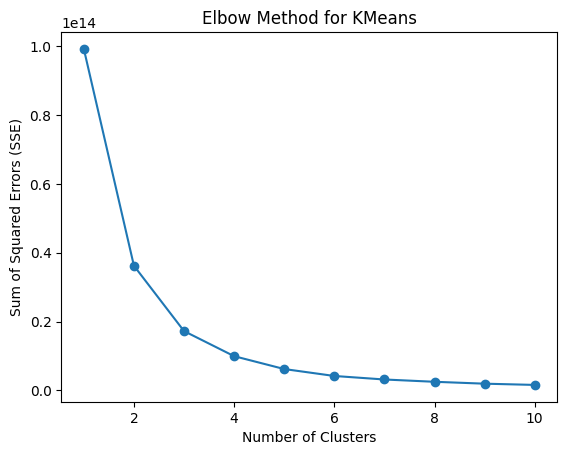

In [ ]:
def find_optimal_clusters_kmeans(data, max_k):
    sse = [] # Suma de los errores cuadrados
    for k in range(1, max_k+1): #iteracion del k en el rango de 1 a 10
        kmeans = KMeans(n_clusters=k, n_init=max_k).fit(data) #por cada k entrenamos el modelo
        sse.append(kmeans.inertia_)                           #agregamos el error cuadrado al array
    #graficamos la curva del codo
    plt.plot(range(1, max_k+1), sse, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title("Elbow Method for KMeans")
    plt.show()
#usamos la funcion para buscar el numero de clusters optimo para elmodelo KMeans
find_optimal_clusters_kmeans(X, 10)

In [ ]:
#creacion del modelo con K optimo
kmeans = KMeans(n_clusters=3, random_state=42)
#entrenamos el modelo y guardamos los resutados en la variable clusters
clusters = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# creamos un df para el modelo KMeans, al que le vamos a agregar los clusters obtenidos
df_filtrado_km = df_filtrado.copy()
df_filtrado_km['clusters'] = clusters
df_filtrado_km

,id_provincia,provincia,id_cultivo,campania,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento,clusters
3801,6,Buenos Aires,28,1969/1970,Trigo total,47000,42000,71400,1700,0
3802,6,Buenos Aires,28,1969/1970,Trigo total,35000,33000,59400,1800,0
3803,6,Buenos Aires,28,1969/1970,Trigo total,125000,110000,143000,1300,1
3804,6,Buenos Aires,28,1969/1970,Trigo total,45000,43000,75250,1750,0
3805,6,Buenos Aires,28,1969/1970,Trigo total,20000,20000,34000,1700,0


In [ ]:
df_filtrado_km['produccion'] = pd.to_numeric(df_filtrado_km['produccion'], errors='coerce')
df_filtrado_km['rendimiento'] = pd.to_numeric(df_filtrado_km['rendimiento'], errors='coerce')
df_filtrado_km['sup_cosechada'] = pd.to_numeric(df_filtrado_km['sup_cosechada'], errors='coerce')
df_filtrado_km['sup_sembrada'] = pd.to_numeric(df_filtrado_km['sup_sembrada'], errors='coerce')
# Convertir lkas columnas a entero
df_filtrado_km['produccion'] = df_filtrado_km['produccion'].astype(int)
df_filtrado_km['rendimiento'] = df_filtrado_km['rendimiento'].astype(int)
df_filtrado_km['sup_cosechada'] = df_filtrado_km['sup_cosechada'].astype(int)
df_filtrado_km['sup_sembrada'] = df_filtrado_km['sup_sembrada'].astype(int)

In [ ]:
df_filtrado_km

,id_provincia,provincia,id_cultivo,campania,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento,clusters
3801,6,Buenos Aires,28,1969/1970,Trigo total,47000,42000,71400,1700,0
3802,6,Buenos Aires,28,1969/1970,Trigo total,35000,33000,59400,1800,0
3803,6,Buenos Aires,28,1969/1970,Trigo total,125000,110000,143000,1300,1
3804,6,Buenos Aires,28,1969/1970,Trigo total,45000,43000,75250,1750,0
3805,6,Buenos Aires,28,1969/1970,Trigo total,20000,20000,34000,1700,0
...,...,...,...,...,...,...,...,...,...,...
153884,90,Tucuman,28,2022/2023,Trigo total,11880,10440,7308,700,0
153885,90,Tucuman,28,2022/2023,Trigo total,15300,14325,8595,600,0
153886,90,Tucuman,28,2022/2023,Trigo total,300,300,330,1100,0
153887,90,Tucuman,28,2022/2023,Trigo total,200,200,200,1000,0


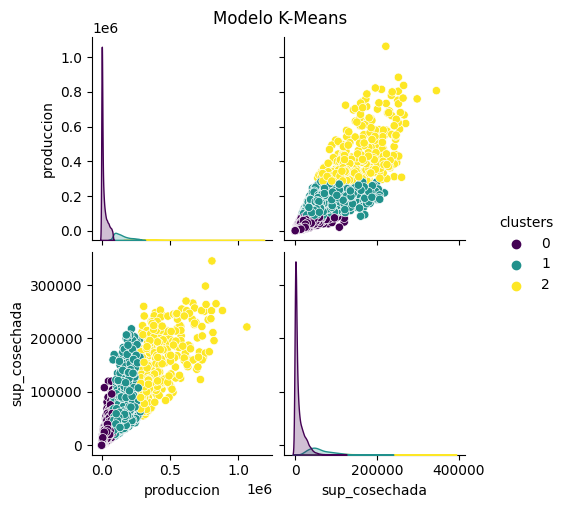

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_filtrado_km, hue='clusters', palette='viridis', vars=['produccion', 'sup_cosechada'])
plt.suptitle('Modelo K-Means', y=1)
plt.show()

In [ ]:
columnas_seleccionadas = ['provincia', 'produccion', 'rendimiento', 'sup_cosechada', 'sup_sembrada']

# Creamos el nuevo DataFrame df_agrupado
df_agrupado = df_filtrado_km[columnas_seleccionadas]
df_agrupado

,provincia,produccion,rendimiento,sup_cosechada,sup_sembrada
3801,Buenos Aires,71400,1700,42000,47000
3802,Buenos Aires,59400,1800,33000,35000
3803,Buenos Aires,143000,1300,110000,125000
3804,Buenos Aires,75250,1750,43000,45000
3805,Buenos Aires,34000,1700,20000,20000
...,...,...,...,...,...
153884,Tucuman,7308,700,10440,11880
153885,Tucuman,8595,600,14325,15300
153886,Tucuman,330,1100,300,300
153887,Tucuman,200,1000,200,200


In [ ]:
df_agrupado_por_provincia = df_agrupado.groupby('provincia').sum().reset_index()

# Visualizar el DataFrame agrupado por 'provincia'
df_agrupado_por_provincia


,provincia,produccion,rendimiento,sup_cosechada,sup_sembrada
0,Buenos Aires,365426402,13254423,154392727,160939168
1,Catamarca,835464,189534,519630,556530
2,Chaco,3920075,1116852,2811093,3303576
3,Chubut,3890,27741,4000,9525
4,Cordoba,84027691,1738993,38653094,42609612
5,Corrientes,81276,126333,44988,48845
6,Entre Rios,30757549,1662576,12289655,12960205
7,Formosa,103501,123081,74710,89320
8,Jujuy,148343,387298,78265,87019
9,La Pampa,32769363,1332422,20498705,23294435


In [ ]:
X2 = df_agrupado_por_provincia[['produccion']]

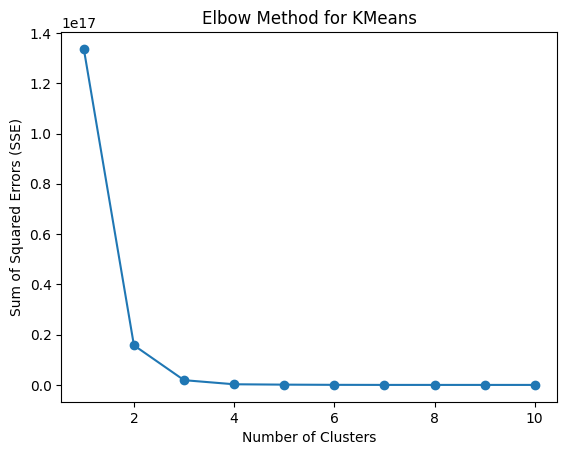

In [ ]:
find_optimal_clusters_kmeans(X2, 10)

In [ ]:
#creacion del modelo con K optimo
kmeans = KMeans(n_clusters=3, random_state=42)
#entrenamos el modelo y guardamos los resutados en la variable clusters
clusters = kmeans.fit_predict(X2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# creamos un df para el modelo KMeans, al que le vamos a agregar los clusters obtenidos
df_agrupado_por_provincia_km = df_agrupado_por_provincia.copy()
df_agrupado_por_provincia_km['clusters'] = clusters
df_agrupado_por_provincia_km

,provincia,produccion,rendimiento,sup_cosechada,sup_sembrada,clusters
0,Buenos Aires,365426402,13254423,154392727,160939168,1
1,Catamarca,835464,189534,519630,556530,2
2,Chaco,3920075,1116852,2811093,3303576,2
3,Chubut,3890,27741,4000,9525,2
4,Cordoba,84027691,1738993,38653094,42609612,0
5,Corrientes,81276,126333,44988,48845,2
6,Entre Rios,30757549,1662576,12289655,12960205,2
7,Formosa,103501,123081,74710,89320,2
8,Jujuy,148343,387298,78265,87019,2
9,La Pampa,32769363,1332422,20498705,23294435,2


In [ ]:
mapear = {2: 'Medio Bajo',0: 'Medio Alto',1: 'Muy Alto'}

df_agrupado_por_provincia_km['nivel_produccion'] = df_agrupado_por_provincia_km['clusters'].map(mapear)

# Mostrar el DataFrame actualizado
df_agrupado_por_provincia_km

,provincia,produccion,rendimiento,sup_cosechada,sup_sembrada,clusters,nivel_produccion
0,Buenos Aires,365426402,13254423,154392727,160939168,1,Muy Alto
1,Catamarca,835464,189534,519630,556530,2,Medio Bajo
2,Chaco,3920075,1116852,2811093,3303576,2,Medio Bajo
3,Chubut,3890,27741,4000,9525,2,Medio Bajo
4,Cordoba,84027691,1738993,38653094,42609612,0,Medio Alto
5,Corrientes,81276,126333,44988,48845,2,Medio Bajo
6,Entre Rios,30757549,1662576,12289655,12960205,2,Medio Bajo
7,Formosa,103501,123081,74710,89320,2,Medio Bajo
8,Jujuy,148343,387298,78265,87019,2,Medio Bajo
9,La Pampa,32769363,1332422,20498705,23294435,2,Medio Bajo


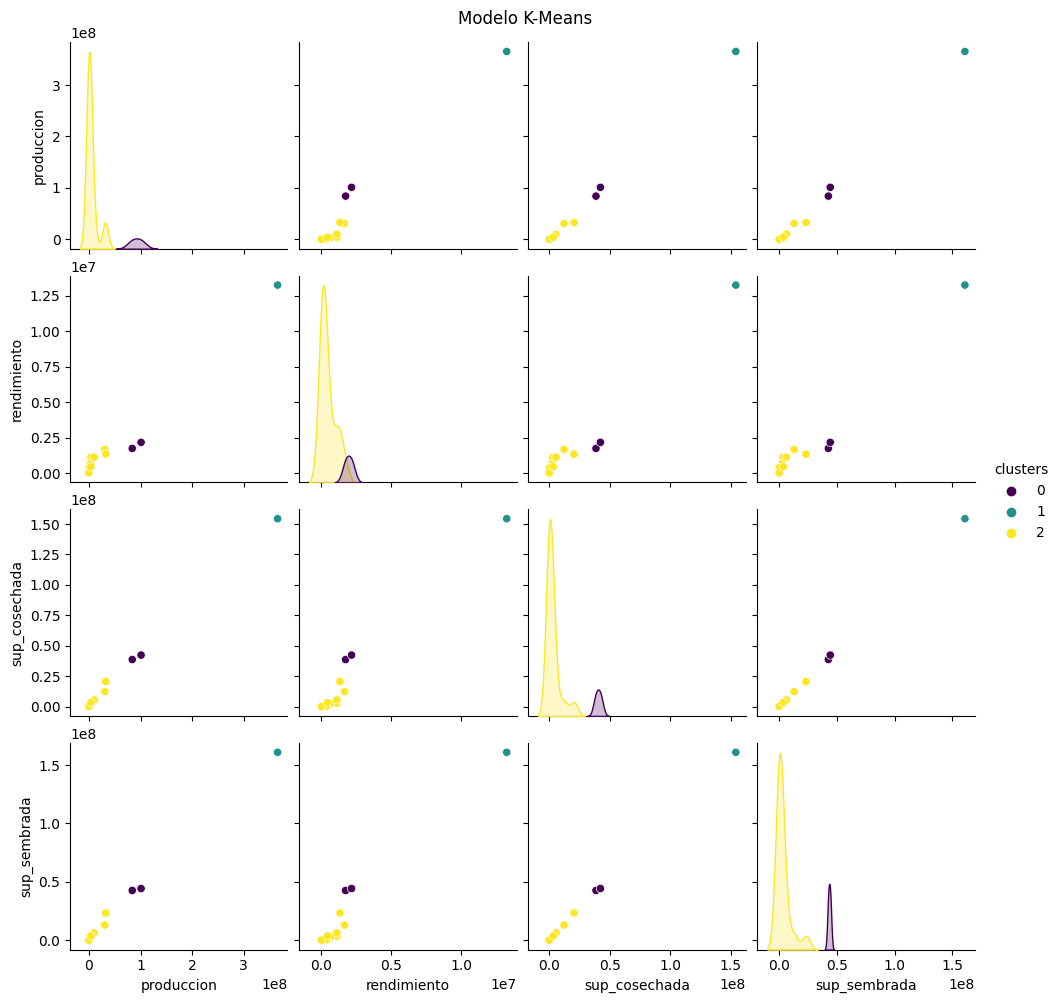

In [ ]:
sns.pairplot(df_agrupado_por_provincia_km, hue='clusters', palette='viridis', vars=['produccion','rendimiento', 'sup_cosechada', 'sup_sembrada'])
plt.suptitle('Modelo K-Means', y=1)
plt.show()

In [ ]:
#  grafico de dispersin (scatter matrix) con plotly
fig = px.scatter_matrix(
    df_agrupado_por_provincia_km,
    dimensions=['produccion', 'rendimiento', 'sup_cosechada', 'sup_sembrada'],
    color='provincia',
    symbol='clusters',
    title='Visualizacion de produccion y rendmiento por provincia'
)


fig.show()

In [ ]:
import plotly.express as px

# Grafico con symbols para cada cluster y con discriminaciond e nivel de produccion
fig = px.scatter_matrix(
    df_agrupado_por_provincia_km,
    dimensions=['produccion', 'rendimiento', 'sup_cosechada', 'sup_sembrada'],
    color='provincia',
    symbol='nivel_produccion',
    labels={'clusters': 'Clusters'},
    title='Pair Plot con Información de Clusters y Tamaño de Puntos Ajustado',
)
fig.show()

### Estimacion Soja

In [11]:
# Cultivos Seleccionados
cultivos_deseados = ['soja']

# Filtro el DataFrame para incluir todas las filas donde el nombre del cultivo contiene la palabra "soja"
df_filtrado_soja = nuevo_df[nuevo_df['cultivo'].str.contains('soja', case=False)]

df_filtrado_soja

,id_provincia,provincia,id_cultivo,campania,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
3478,6,Buenos Aires,25,1969/1970,Soja total,150,150,191,1273
3479,6,Buenos Aires,25,1969/1970,Soja total,50,50,65,1300
3480,6,Buenos Aires,25,1969/1970,Soja total,120,120,144,1200
3481,6,Buenos Aires,25,1969/1970,Soja total,600,600,780,1300
3482,6,Buenos Aires,25,1969/1970,Soja total,150,150,170,1133
...,...,...,...,...,...,...,...,...,...
153322,90,Tucuman,25,2022/2023,Soja total,1200,1200,2400,2000
153323,90,Tucuman,25,2022/2023,Soja total,500,500,950,1900
153324,90,Tucuman,25,2022/2023,Soja total,400,400,760,1900
153325,90,Tucuman,25,2022/2023,Soja total,2800,2800,4200,1500


In [ ]:
df_filtrado_km['produccion'] = pd.to_numeric(df_filtrado_km['produccion'], errors='coerce')
df_filtrado_km['rendimiento'] = pd.to_numeric(df_filtrado_km['rendimiento'], errors='coerce')
df_filtrado_km['sup_cosechada'] = pd.to_numeric(df_filtrado_km['sup_cosechada'], errors='coerce')
df_filtrado_km['sup_sembrada'] = pd.to_numeric(df_filtrado_km['sup_sembrada'], errors='coerce')
# Convertir lkas columnas a entero
df_filtrado_km['produccion'] = df_filtrado_km['produccion'].astype(int)
df_filtrado_km['rendimiento'] = df_filtrado_km['rendimiento'].astype(int)
df_filtrado_km['sup_cosechada'] = df_filtrado_km['sup_cosechada'].astype(int)
df_filtrado_km['sup_sembrada'] = df_filtrado_km['sup_sembrada'].astype(int)